# **Assignment 04**

#### Name:- Sk Fardeen Hossain
#### Roll No. :- 2021CSB023
#### G-Suite Id:- 2021csb023.sk@students.iiests.ac.in
#### Department:- Computer Science and Technology

## **Question 01**

Download and install TensorFlow from https://www.tensorflow.org/install/install_sources or using command sudo pip install tensorflow (Alternatively the Keras library can be used).



In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Install the tensorflow library
!pip install tensorflow

## **Question 02**
Download the MNIST dataset (contains class labels for digits 0 − 9)

In [3]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

As we can see, every image is given as a 28x28 pixel map where every value ranges from 0 to 255 on an intensity scale (0 ---> white and 255 ---> black).
So it is basically a gray-scale image.

The image is a 5


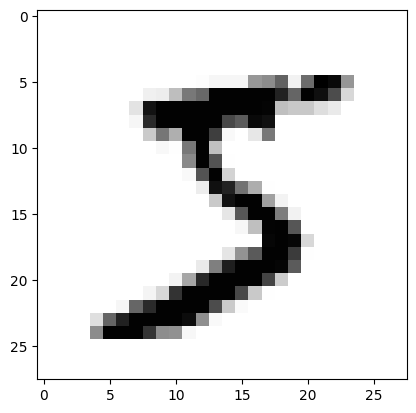

In [6]:
# Let's see a sample image

import matplotlib.pyplot as plt

plt.imshow(X_train[0],cmap="Greys")

print(f"The image is a {y_train[0]}")

## **Question 03**

Reduce the training size by 1/10 if computation resources are limited. Define Radial Basis Function (RBF) as
`
def RBF(x, c, s):
return np.exp(-np.sum((x - c) ** 2, axis = 1)/(2 * s ** 2))
`
, where x is the actual value, c is center (assumed as mean) and s is the standard
deviation.
Converted 28 × 28 image into 32 × 32 using rbf and store the new dataset with the
labels. Split the dataset as 80% training and 10% validation and 10% test.

In [7]:
import numpy as np

def RBF(x, c, s):
  return np.exp(-np.sum((x-c)**2)/(2*s**2))

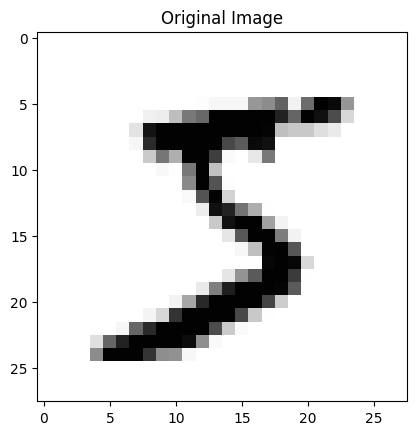

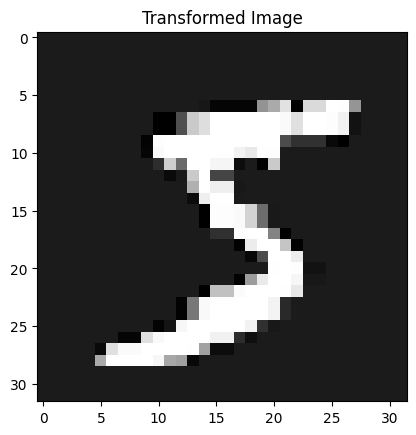

In [8]:
## Convert a 28x28 image to 32x32 using RBF

# Assuming x_train[0] is a 28x28 image
image = X_train[0]

# Calculate mean and standard deviation of the image
mean = np.mean(image)
std = np.std(image)

# Vectorize the RBF function to apply it element-wise on the image
RBF_vectorized = np.vectorize(RBF)

x_new = np.linspace(0, 27, 32).astype(int)  # Mapping 32 points to 28
y_new = np.linspace(0, 27, 32).astype(int)

# Resize the image by selecting pixels from the original 28x28 image
new_image = image[np.ix_(x_new, y_new)]

# Apply the RBF kernel on the resized image element-wise
new_image = RBF_vectorized(new_image, mean, std)

plt.imshow(image,cmap="Greys")
plt.title("Original Image")
plt.show()

plt.imshow(new_image,cmap="Greys")
plt.title("Transformed Image")
plt.show()

In [9]:
## Do this iteratively for all the images
'''
  @params:- A 28x28 image
  @return:- A 32x32 image
  @brief:- Convert a 28x28 image to 32x32 using RBF
'''
RBF_vectorized = np.vectorize(RBF)

def get_transformed_image(image):
  mean = np.mean(image)
  std = np.std(image)
  x_new = np.linspace(0, 27, 32).astype(int)  # Mapping 32 points to 28
  y_new = np.linspace(0, 27, 32).astype(int)

  # Resize the image by selecting pixels from the original 28x28 image
  new_image = image[np.ix_(x_new, y_new)]

  # Apply the RBF kernel on the resized image element-wise
  new_image = RBF_vectorized(new_image, mean, std)

  return new_image


In [10]:
# Combine both training and testing data into training for more samples
X_train = np.concatenate((X_train,X_test),axis=0)
y_train = np.concatenate((y_train,y_test),axis=0)
X_train.shape

(70000, 28, 28)

In [11]:
# Training Data -> 80% , Validation Data -> 10% , Testing Data -> 10%

from sklearn.model_selection import train_test_split

X_train, X_rem, y_train, y_rem = train_test_split(X_train, y_train, test_size=0.2, random_state=4)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=4)

In [12]:
from tqdm import tqdm
X_train_transformed = np.empty((X_train.shape[0],32,32))

for i,image in tqdm(enumerate(X_train)):
  X_train_transformed[i] = get_transformed_image(image)

X_train_transformed.shape

56000it [08:56, 104.33it/s]


(56000, 32, 32)

In [13]:
X_val_transformed = np.empty((X_val.shape[0],32,32))

for i,image in tqdm(enumerate(X_val)):
  X_val_transformed[i] = get_transformed_image(image)

X_val_transformed.shape

7000it [01:06, 105.69it/s]


(7000, 32, 32)

In [14]:
X_test_transformed = np.empty((X_test.shape[0],32,32))

for i,image in tqdm(enumerate(X_test)):
  X_test_transformed[i] = get_transformed_image(image)

X_test_transformed.shape

7000it [01:06, 105.69it/s]


(7000, 32, 32)

In [15]:
# Renaming
X_train = X_train_transformed
X_val = X_val_transformed
X_test = X_test_transformed

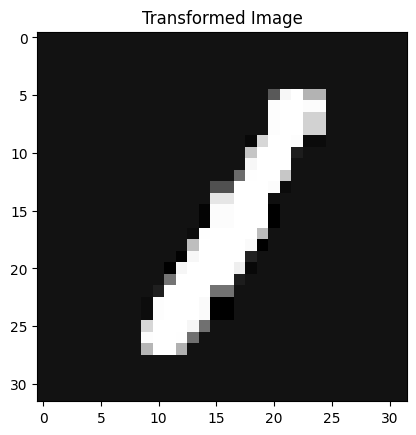

In [16]:
plt.imshow(X_train[28],cmap="Greys")
plt.title("Transformed Image")
plt.show()


In [17]:
# One hot encode the target labels [0-9]

import pandas as pd

y_train = pd.get_dummies(y_train,dtype='int').to_numpy()
y_val = pd.get_dummies(y_val,dtype='int').to_numpy()
y_test = pd.get_dummies(y_test,dtype='int').to_numpy()
y_train[28]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

## **Question 04**

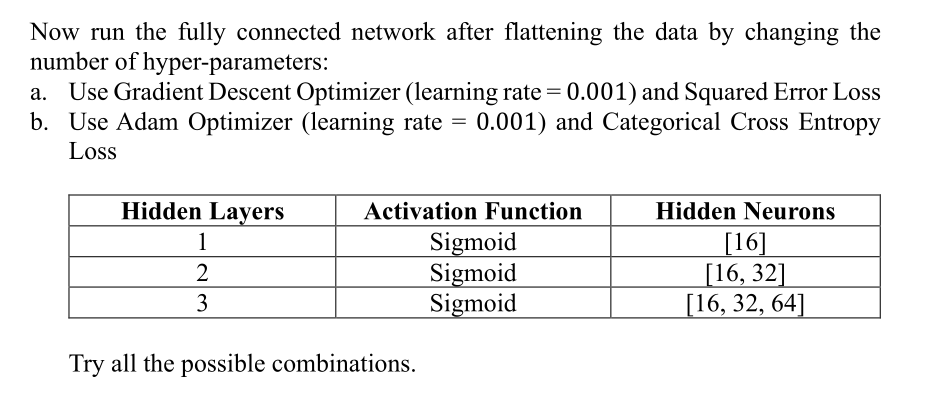

In [21]:
# Import necessary libraries
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.losses import MeanSquaredError,CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import EarlyStopping # Stop training when a monitored metric has stopped improving
import time # Calculate training time

# Defining Utility functions
def train_model(
    activation_func: 'str',
    hidden_neurons: 'list(int)',
    optimizer: 'tensorflow.keras.optimizers',
    loss_func: 'tensorflow.keras.losses',
    epochs: 'int',
    dropout_rate: 'float' = None,
    learning_rate: 'float' = 0.001,

):
  model = Sequential()  # Sequential model (feed forward neural net)
  # Adding the input layer
  model.add(Input(shape=(32,32)))

  # Flatten the input
  model.add(Flatten())

  # Hidden Layer Addition
  for i in range(len(hidden_neurons)):
    model.add(Dense(hidden_neurons[i], activation=activation_func))
    if dropout_rate:
      model.add(Dropout(rate=dropout_rate))

  # Adding the Output Layer
  model.add(Dense(10, activation='softmax'))  # Multiclass classification so softmax activation function

  # Model summary
  model.summary()

  # Compile the model
  model.compile(
        optimizer=optimizer(learning_rate=learning_rate),
        loss=loss_func(),
        metrics=['accuracy']
    )

  start=time.time()

  # Fit the model
  history = model.fit(
      x=X_train,
      y=y_train,
      epochs=epochs,
      validation_data=(X_val, y_val),
      callbacks=[
          EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
      ],
      verbose='auto'
  )

  end=time.time()

  duration = end-start

  return model, history, duration



def plot_metrics(
    history: 'tensorflow.keras.callbacks.History',
    activation_func: 'str',
    hidden_neurons: 'list(int)',
    dropout_rate: 'float' = None
):

  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend()

  if dropout_rate is None:
    plt.title(f"Loss vs epochs for {activation_func} {hidden_neurons}")
  else:
    plt.title(f"Loss vs epochs for {activation_func} {hidden_neurons} dropout {dropout_rate}")

  plt.legend()
  plt.show()

  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend()

  if dropout_rate is None:
    plt.title(f"Accuracy vs epochs for {activation_func} {hidden_neurons}")
  else:
    plt.title(f"Accuracy vs epochs for {activation_func} {hidden_neurons} dropout {dropout_rate}")

  plt.legend()
  plt.show()


In [43]:
import pandas as pd

result_df = pd.DataFrame(
    columns=[
        'Hidden Layers',
        'Activation Function',
        'Hidden Neurons',
        'Optimizer',
        'Training Time(in seconds)',
        'Test Loss',
        'Test Accuracy'
    ]
)

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_16 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 16)                  │          16,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,570 (64.73 KB)

 Trainable params: 16,570 (64.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0980 - loss: 0.0954 - val_accuracy: 0.0943 - val_loss: 0.0926
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0970 - loss: 0.0922 - val_accuracy: 0.0976 - val_loss: 0.0913
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1023 - loss: 0.0912 - val_accuracy: 0.1031 - val_loss: 0.0908
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1053 - loss: 0.0907 - val_accuracy: 0.1040 - val_loss: 0.0904
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1082 - loss: 0.0904 - val_accuracy: 0.1161 - val_loss: 0.0902
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1191 - loss: 0.0903 - val_accuracy: 0.1334 - val_loss: 0.0901
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1364 - loss: 0.0901 - val_accuracy: 0.1534 - val_loss: 0.0899
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1504 - loss: 0

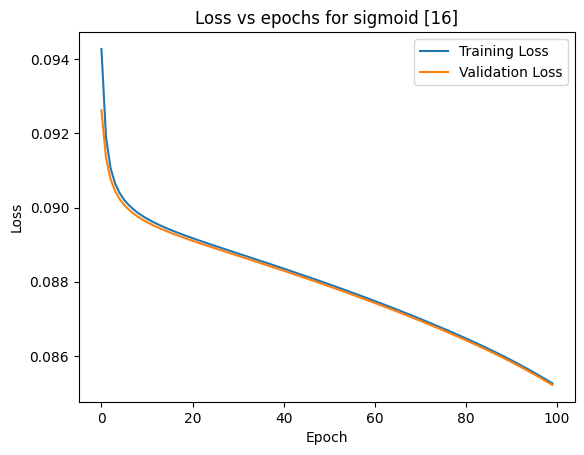

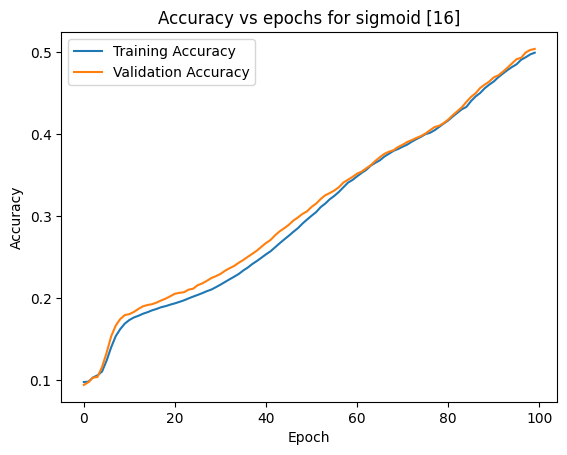

In [44]:
## Model 1 --> SGD, lr =0.001, Mean Squared Error loss, hidden_neurons=[16]

hidden_neurons = [16]
activation_function = 'sigmoid'

model, history, duration = train_model(
    activation_func=activation_function,
    hidden_neurons=hidden_neurons,
    optimizer=SGD,
    loss_func=MeanSquaredError,
    epochs=100,
    dropout_rate=None,
    learning_rate=0.001
)

test_loss, test_acc = model.evaluate(X_test,y_test)

print(f"Test loss={test_loss} Test accuracy = {test_acc}")
print(f"Time required for training the model is {duration} seconds")

result_df.loc[len(result_df.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    'SGD',
    duration,
    test_loss,
    test_acc
]

plot_metrics(history, activation_function, hidden_neurons)

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_17 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 16)                  │          16,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,274 (67.48 KB)

 Trainable params: 17,274 (67.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1012 - loss: 0.0943 - val_accuracy: 0.1037 - val_loss: 0.0939
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1008 - loss: 0.0938 - val_accuracy: 0.1056 - val_loss: 0.0935
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1024 - loss: 0.0934 - val_accuracy: 0.1083 - val_loss: 0.0931
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1018 - loss: 0.0930 - val_accuracy: 0.1090 - val_loss: 0.0928
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1051 - loss: 0.0928 - val_accuracy: 0.1101 - val_loss: 0.0926
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1031 - loss: 0.0925 - val_accuracy: 0.1100 - val_loss: 0.0923
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1040 - loss: 0.0923 - val_accuracy: 0.1113 - val_loss: 0.0922
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1077 - loss: 0

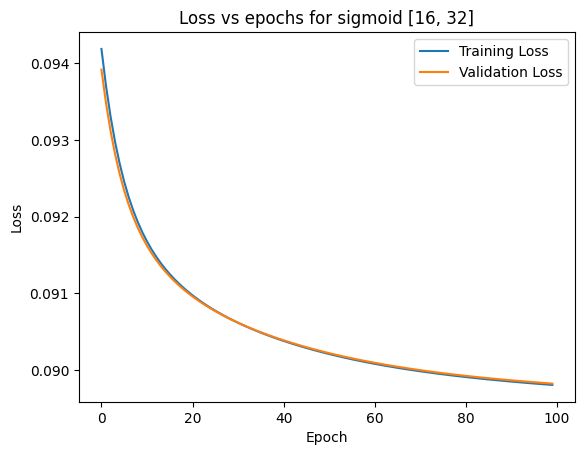

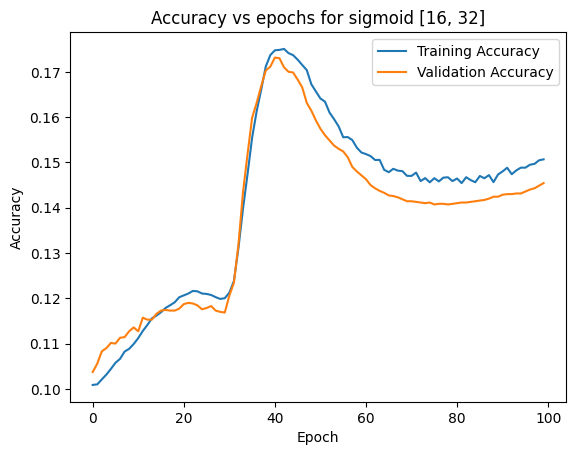

In [45]:
## Model 2 --> SGD, lr =0.001, Mean Squared Error loss, hidden_neurons=[16,32]

hidden_neurons = [16,32]
activation_function = 'sigmoid'

model, history,duration = train_model(
    activation_func=activation_function,
    hidden_neurons=hidden_neurons,
    optimizer=SGD,
    loss_func=MeanSquaredError,
    epochs=100,
    dropout_rate=None,
    learning_rate=0.001
)

test_loss, test_acc = model.evaluate(X_test,y_test)

print(f"Test loss={test_loss} Test accuracy = {test_acc}")
print(f"Time required to train the model is {duration} seconds")

result_df.loc[len(result_df.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    'SGD',
    duration,
    test_loss,
    test_acc
]

plot_metrics(history, activation_function, hidden_neurons)

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_18 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 16)                  │          16,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,706 (76.98 KB)

 Trainable params: 19,706 (76.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0966 - loss: 0.0969 - val_accuracy: 0.0943 - val_loss: 0.0956
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0975 - loss: 0.0950 - val_accuracy: 0.0943 - val_loss: 0.0945
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0970 - loss: 0.0942 - val_accuracy: 0.0943 - val_loss: 0.0938
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0984 - loss: 0.0935 - val_accuracy: 0.0943 - val_loss: 0.0934
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0977 - loss: 0.0931 - val_accuracy: 0.0943 - val_loss: 0.0930
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0994 - loss: 0.0927 - val_accuracy: 0.0943 - val_loss: 0.0928
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0968 - loss: 0.0926 - val_accuracy: 0.0943 - val_loss: 0.0925
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0976 - loss: 0

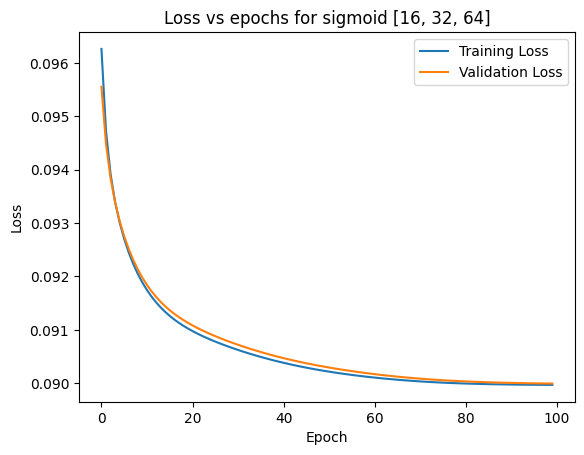

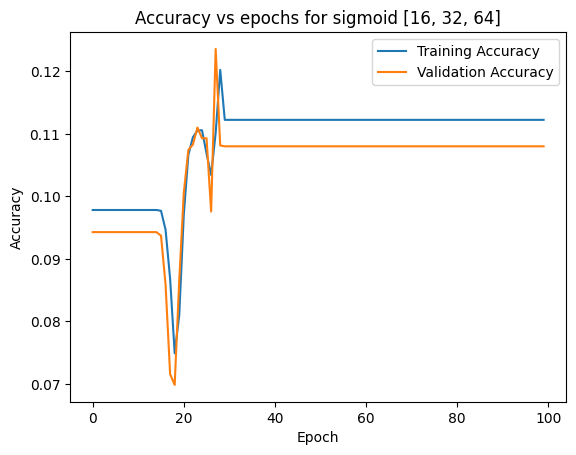

In [46]:
## Model 3 --> SGD, lr =0.001, Mean Squared Error loss, hidden_neurons=[16,32,64]

hidden_neurons = [16,32,64]
activation_function = 'sigmoid'

model, history, duration = train_model(
    activation_func=activation_function,
    hidden_neurons=hidden_neurons,
    optimizer=SGD,
    loss_func=MeanSquaredError,
    epochs=100,
    dropout_rate=None,
    learning_rate=0.001
)

test_loss, test_acc = model.evaluate(X_test,y_test)

print(f"Test loss={test_loss} Test accuracy = {test_acc}")
print(f"Time required to train the model is {duration} seconds")

result_df.loc[len(result_df.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    'SGD',
    duration,
    test_loss,
    test_acc
]

plot_metrics(history, activation_function, hidden_neurons)

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_19 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 16)                  │          16,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,570 (64.73 KB)

 Trainable params: 16,570 (64.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5717 - loss: 1.5646 - val_accuracy: 0.8673 - val_loss: 0.5924
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8753 - loss: 0.5274 - val_accuracy: 0.8887 - val_loss: 0.4196
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8940 - loss: 0.3933 - val_accuracy: 0.8933 - val_loss: 0.3756
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9047 - loss: 0.3397 - val_accuracy: 0.9036 - val_loss: 0.3434
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9084 - loss: 0.3175 - val_accuracy: 0.9133 - val_loss: 0.3095
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9134 - loss: 0.2966 - val_accuracy: 0.9081 - val_loss: 0.3137
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9127 - loss: 0.2955 - val_accuracy: 0.9123 - val_loss: 0.3034
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9158 - loss: 0

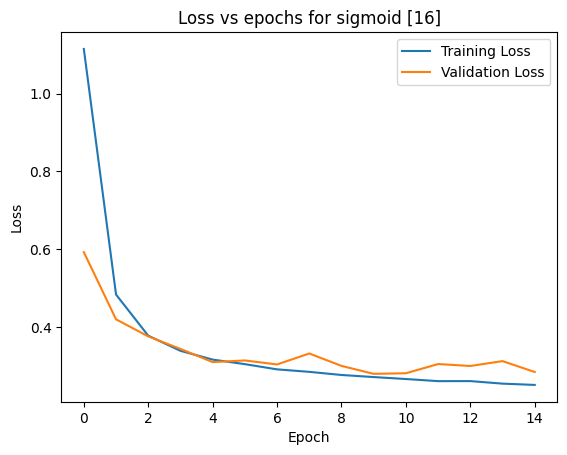

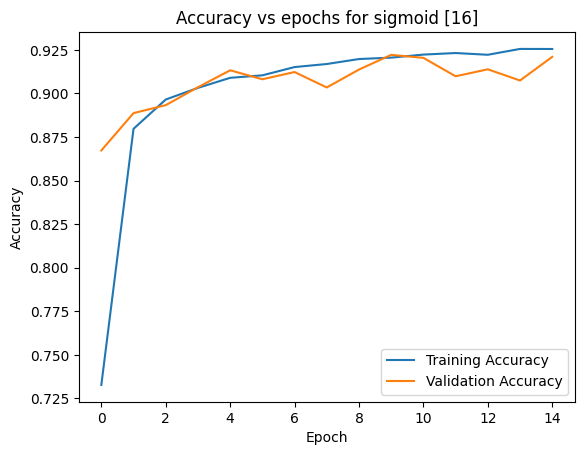

In [47]:
## Model 4 --> Adam, lr =0.001, CCE loss, hidden_neurons=[16]

hidden_neurons = [16]
activation_function = 'sigmoid'

model, history,duration = train_model(
    activation_func=activation_function,
    hidden_neurons=hidden_neurons,
    optimizer=Adam,
    loss_func=CategoricalCrossentropy,
    epochs=100,
    dropout_rate=None,
    learning_rate=0.001
)

test_loss, test_acc = model.evaluate(X_test,y_test)

print(f"Test loss={test_loss} Test accuracy = {test_acc}")
print(f"Time required to train the model is {duration} seconds")

result_df.loc[len(result_df.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    'Adam',
    duration,
    test_loss,
    test_acc
]

plot_metrics(history, activation_function, hidden_neurons)

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_20 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 16)                  │          16,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,274 (67.48 KB)

 Trainable params: 17,274 (67.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4717 - loss: 1.8169 - val_accuracy: 0.8436 - val_loss: 0.6044
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8507 - loss: 0.5469 - val_accuracy: 0.8896 - val_loss: 0.4074
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8866 - loss: 0.3982 - val_accuracy: 0.8957 - val_loss: 0.3695
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8988 - loss: 0.3551 - val_accuracy: 0.9057 - val_loss: 0.3348
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9074 - loss: 0.3195 - val_accuracy: 0.9083 - val_loss: 0.3220
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9120 - loss: 0.2994 - val_accuracy: 0.9109 - val_loss: 0.3060
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9147 - loss: 0.2884 - val_accuracy: 0.9074 - val_loss: 0.3233
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9195 - loss: 0

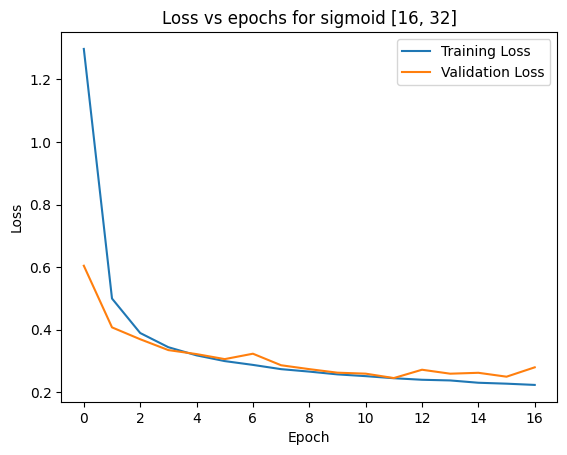

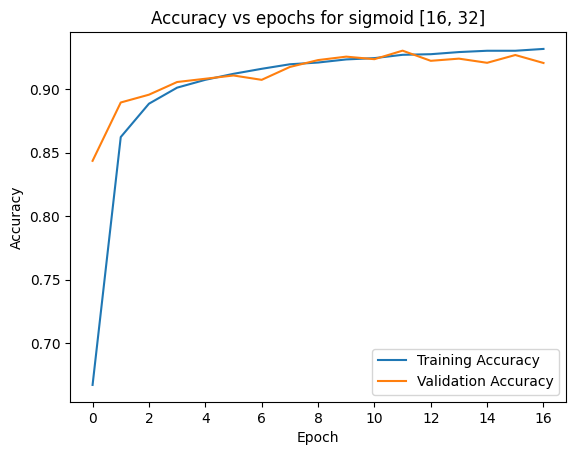

In [48]:
## Model 5 --> Adam, lr =0.001, CCE loss, hidden_neurons=[16,32]

hidden_neurons = [16,32]
activation_function = 'sigmoid'

model, history,duration = train_model(
    activation_func=activation_function,
    hidden_neurons=hidden_neurons,
    optimizer=Adam,
    loss_func=CategoricalCrossentropy,
    epochs=100,
    dropout_rate=None,
    learning_rate=0.001
)

test_loss, test_acc = model.evaluate(X_test,y_test)

print(f"Test loss={test_loss} Test accuracy = {test_acc}")
print(f"Time taken to train the model is {duration} seconds")

result_df.loc[len(result_df.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    'Adam',
    duration,
    test_loss,
    test_acc
]

plot_metrics(history, activation_function, hidden_neurons)

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_21 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 16)                  │          16,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,706 (76.98 KB)

 Trainable params: 19,706 (76.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4173 - loss: 1.7356 - val_accuracy: 0.8176 - val_loss: 0.6427
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8375 - loss: 0.5732 - val_accuracy: 0.8529 - val_loss: 0.5020
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8826 - loss: 0.4201 - val_accuracy: 0.8841 - val_loss: 0.3995
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8932 - loss: 0.3659 - val_accuracy: 0.8980 - val_loss: 0.3518
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9025 - loss: 0.3347 - val_accuracy: 0.9119 - val_loss: 0.3181
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9079 - loss: 0.3120 - val_accuracy: 0.9133 - val_loss: 0.3068
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9131 - loss: 0.2963 - val_accuracy: 0.9213 - val_loss: 0.2845
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9166 - loss: 0

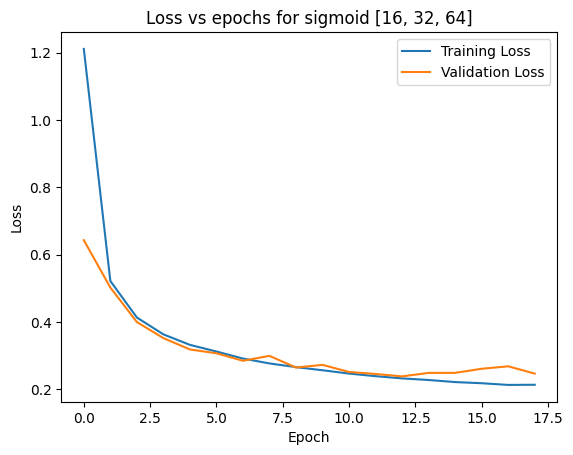

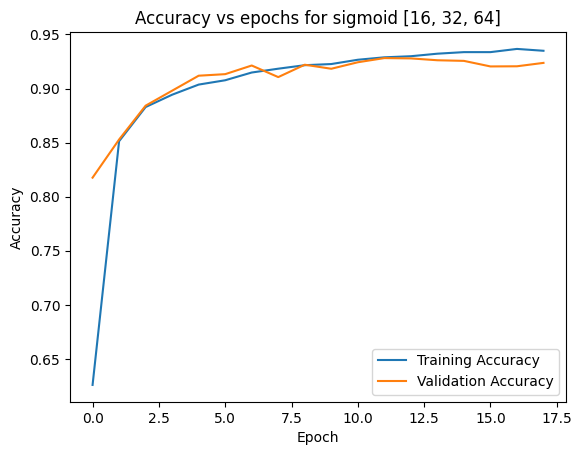

In [49]:
## Model 6 --> Adam, lr =0.001, CCE loss, hidden_neurons=[16,32,64]

hidden_neurons = [16,32,64]
activation_function = 'sigmoid'

model, history, duration = train_model(
    activation_func=activation_function,
    hidden_neurons=hidden_neurons,
    optimizer=Adam,
    loss_func=CategoricalCrossentropy,
    epochs=100,
    dropout_rate=None,
    learning_rate=0.001
)

test_loss, test_acc = model.evaluate(X_test,y_test)

print(f"Test loss={test_loss} Test accuracy = {test_acc}")
print(f"Time taken to train the model is {duration} seconds")

result_df.loc[len(result_df.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    'Adam',
    duration,
    test_loss,
    test_acc
]

plot_metrics(history, activation_function, hidden_neurons)

In [50]:
result_df

,Hidden Layers,Activation Function,Hidden Neurons,Optimizer,Training Time(in seconds),Test Loss,Test Accuracy
0,1,sigmoid,[16],SGD,428.502323,0.085315,0.497714
1,2,sigmoid,"[16, 32]",SGD,436.430634,0.089831,0.157286
2,3,sigmoid,"[16, 32, 64]",SGD,428.479271,0.089967,0.119429
3,1,sigmoid,[16],Adam,63.880293,0.282636,0.919714
4,2,sigmoid,"[16, 32]",Adam,73.311765,0.245530,0.930714
5,3,sigmoid,"[16, 32, 64]",Adam,84.136901,0.243314,0.931429


## **Question 05**
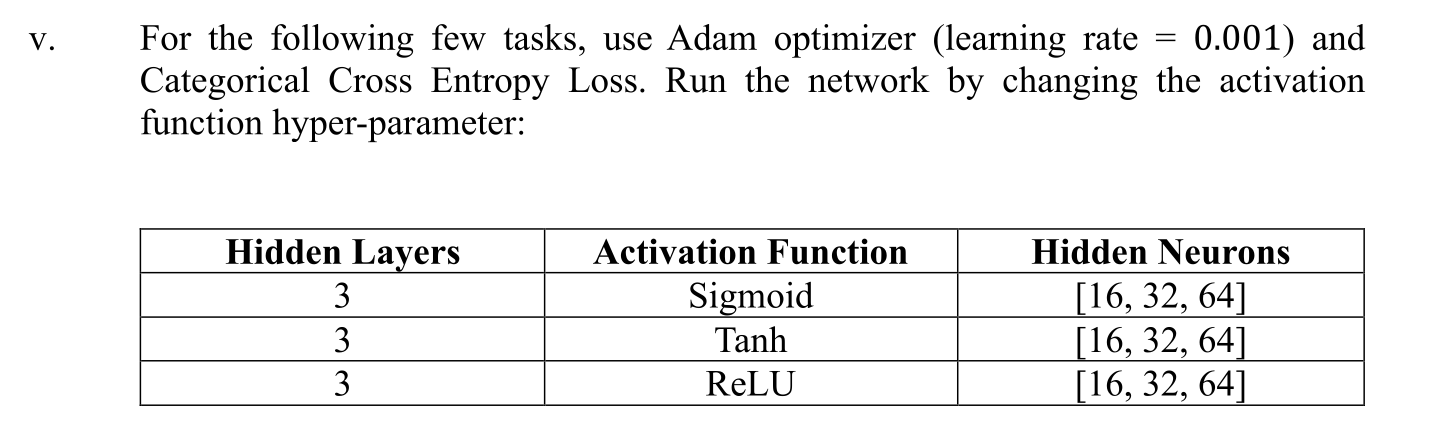

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 16)                  │          16,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,706 (76.98 KB)

 Trainable params: 19,706 (76.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.3228 - loss: 1.9027 - val_accuracy: 0.7813 - val_loss: 0.7335
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8098 - loss: 0.6485 - val_accuracy: 0.8561 - val_loss: 0.4806
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8665 - loss: 0.4655 - val_accuracy: 0.8830 - val_loss: 0.4062
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8819 - loss: 0.4082 - val_accuracy: 0.8849 - val_loss: 0.3973
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8927 - loss: 0.3756 - val_accuracy: 0.8940 - val_loss: 0.3619
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8940 - loss: 0.3618 - val_accuracy: 0.9009 - val_loss: 0.3409
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9006 - loss: 0.3429 - val_accuracy: 0.9093 - val_loss: 0.3141
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9025 - loss: 

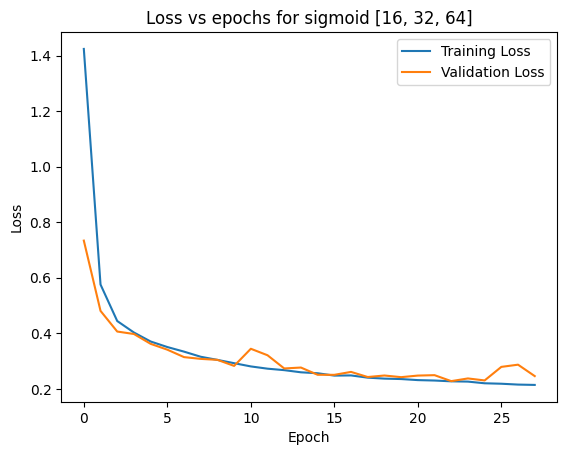

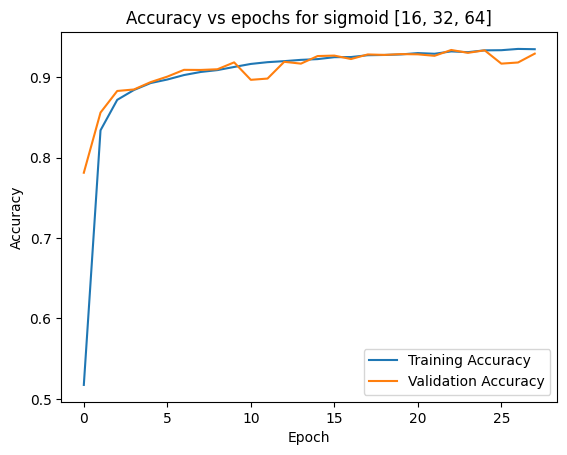

In [31]:
## Model 1 --> Adam, lr =0.001, CCE loss, hidden_neurons=[16,32,64]. Sigmoid

result_df = pd.DataFrame(
    columns=[
        'Hidden Layers',
        'Activation Function',
        'Hidden Neurons',
        'Training Time (in seconds)',
        'Test Loss',
        'Test Accuracy'
    ]
)

hidden_neurons = [16,32,64]
activation_function = 'sigmoid'

model, history, duration = train_model(
    activation_func=activation_function,
    hidden_neurons=hidden_neurons,
    optimizer=Adam,
    loss_func=CategoricalCrossentropy,
    epochs=100,
    dropout_rate=None,
    learning_rate=0.001
)

test_loss, test_acc = model.evaluate(X_test,y_test)

print(f"Test loss={test_loss} Test accuracy = {test_acc}")
print(f"Time taken to train the model is {duration} seconds")

result_df.loc[len(result_df.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    duration,
    test_loss,
    test_acc
]

plot_metrics(history, activation_function, hidden_neurons)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 16)                  │          16,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,706 (76.98 KB)

 Trainable params: 19,706 (76.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6881 - loss: 0.9802 - val_accuracy: 0.8803 - val_loss: 0.4057
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8780 - loss: 0.3985 - val_accuracy: 0.8903 - val_loss: 0.3941
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8899 - loss: 0.3602 - val_accuracy: 0.8843 - val_loss: 0.3828
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8964 - loss: 0.3406 - val_accuracy: 0.9140 - val_loss: 0.2933
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8982 - loss: 0.3361 - val_accuracy: 0.9033 - val_loss: 0.3323
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9023 - loss: 0.3262 - val_accuracy: 0.8996 - val_loss: 0.3387
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9052 - loss: 0.3155 - val_accuracy: 0.9000 - val_loss: 0.3337
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9037 - loss: 0

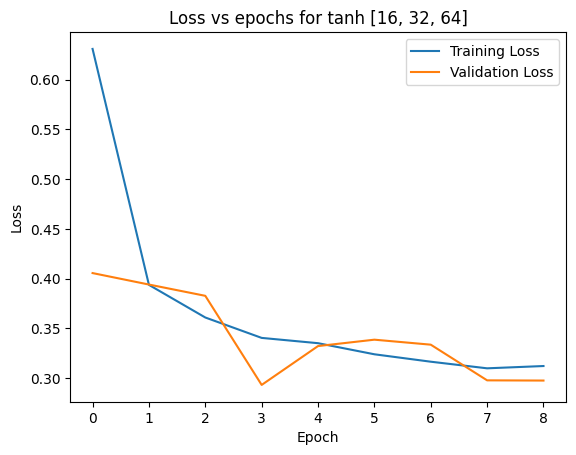

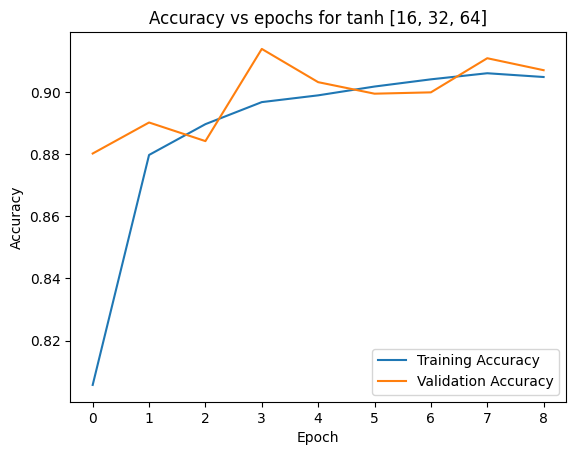

In [32]:
## Model 2 --> Adam, lr =0.001, CCE loss, hidden_neurons=[16,32,64]. tanh

hidden_neurons = [16,32,64]
activation_function = 'tanh'

model, history, duration = train_model(
    activation_func=activation_function,
    hidden_neurons=hidden_neurons,
    optimizer=Adam,
    loss_func=CategoricalCrossentropy,
    epochs=100,
    dropout_rate=None,
    learning_rate=0.001
)

test_loss, test_acc = model.evaluate(X_test,y_test)

print(f"Test loss={test_loss} Test accuracy = {test_acc}")
print(f"Time taken to train the model is {duration} seconds")

result_df.loc[len(result_df.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    duration,
    test_loss,
    test_acc
]

plot_metrics(history, activation_function, hidden_neurons)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 16)                  │          16,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,706 (76.98 KB)

 Trainable params: 19,706 (76.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2840 - loss: 1.8179 - val_accuracy: 0.5450 - val_loss: 1.2585
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5777 - loss: 1.1678 - val_accuracy: 0.6473 - val_loss: 0.9924
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6378 - loss: 1.0118 - val_accuracy: 0.6434 - val_loss: 0.9923
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6501 - loss: 0.9843 - val_accuracy: 0.6601 - val_loss: 0.9445
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6603 - loss: 0.9599 - val_accuracy: 0.6780 - val_loss: 0.9070
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6788 - loss: 0.9196 - val_accuracy: 0.6901 - val_loss: 0.9092
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6863 - loss: 0.9003 - val_accuracy: 0.6916 - val_loss: 0.9044
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6861 - loss: 0

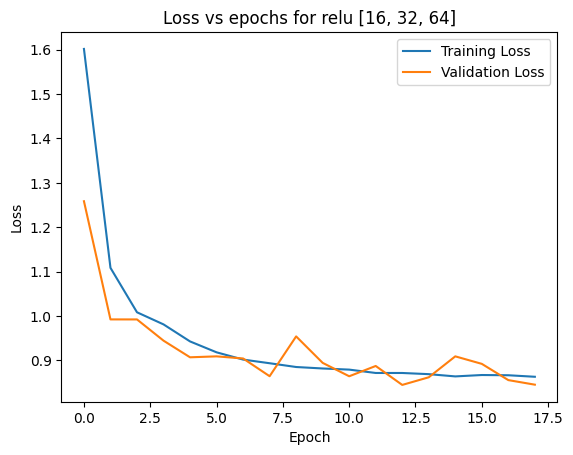

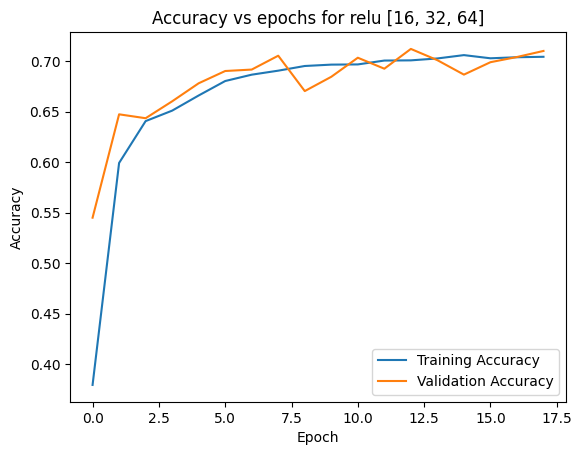

In [33]:
## Model 3 --> Adam, lr =0.001, CCE loss, hidden_neurons=[16,32,64]. relu

hidden_neurons = [16,32,64]
activation_function = 'relu'

model, history, duration = train_model(
    activation_func=activation_function,
    hidden_neurons=hidden_neurons,
    optimizer=Adam,
    loss_func=CategoricalCrossentropy,
    epochs=100,
    dropout_rate=None,
    learning_rate=0.001
)

test_loss, test_acc = model.evaluate(X_test,y_test)

print(f"Test loss={test_loss} Test accuracy = {test_acc}")
print(f"Time taken to train the model is {duration} seconds")

result_df.loc[len(result_df.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    duration,
    test_loss,
    test_acc
]

plot_metrics(history, activation_function, hidden_neurons)

In [34]:
result_df

,Hidden Layers,Activation Function,Hidden Neurons,Training Time (in seconds),Test Loss,Test Accuracy
0,3,sigmoid,"[16, 32, 64]",134.114404,0.229488,0.932857
1,3,tanh,"[16, 32, 64]",41.307181,0.306537,0.910571
2,3,relu,"[16, 32, 64]",81.039238,0.849205,0.709571


From the above table, we can infer that the best activation funtion is `sigmoid`

## **Question 06**
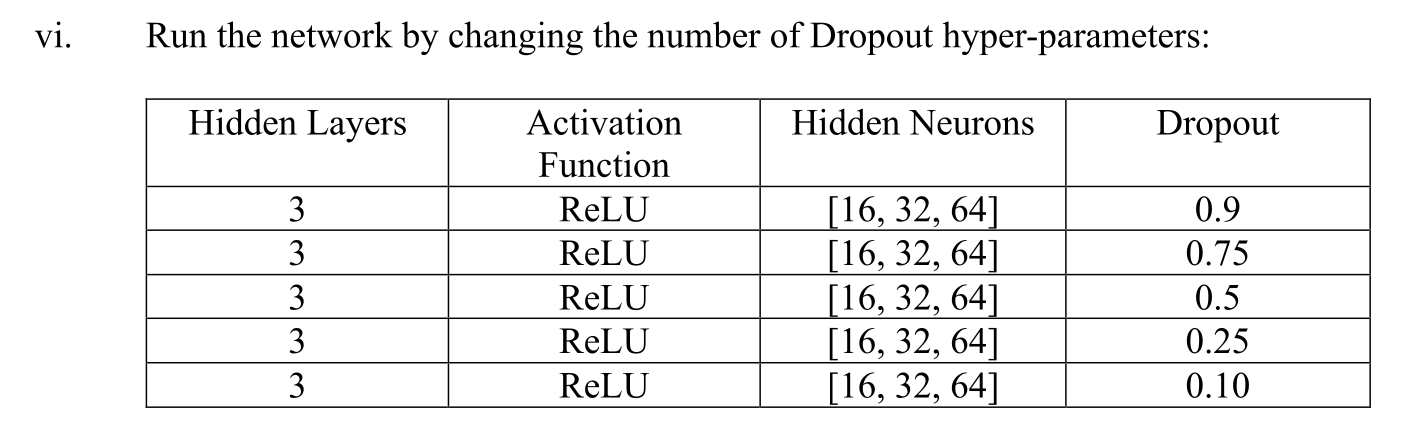

In [35]:
result_df_dropout = pd.DataFrame(
    columns=[
        'Hidden Layers',
        'Activation Function',
        'Hidden Neurons',
        'Dropout Rate',
        'Training Time (in seconds)',
        'Test Loss',
        'Test Accuracy'
    ]
)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 16)                  │          16,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,706 (76.98 KB)

 Trainable params: 19,706 (76.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1100 - loss: 2.3640 - val_accuracy: 0.1080 - val_loss: 2.3021
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1111 - loss: 2.3014 - val_accuracy: 0.1080 - val_loss: 2.3019
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1120 - loss: 2.3011 - val_accuracy: 0.1080 - val_loss: 2.3017
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1106 - loss: 2.3016 - val_accuracy: 0.1080 - val_loss: 2.3019
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1117 - loss: 2.3015 - val_accuracy: 0.1080 - val_loss: 2.3020
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1130 - loss: 2.3014 - val_accuracy: 0.1080 - val_loss: 2.3020
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1118 - loss: 2.3016 - val_accuracy: 0.1080 - val_loss: 2.3021
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1116 - loss: 2

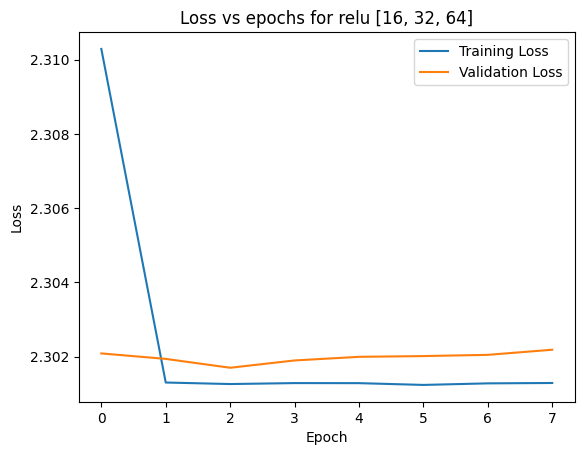

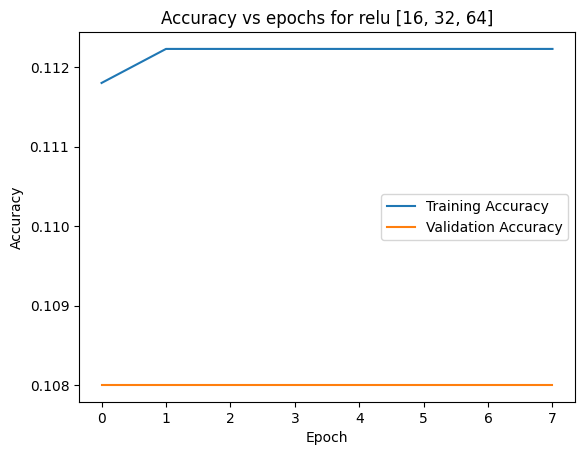

In [36]:
## Model 1 --> Adam, lr =0.001, CCE loss, hidden_neurons=[16,32,64]. relu, dropout=0.9

hidden_neurons = [16,32,64]
activation_function = 'relu'
dropout_rate = 0.9

model, history,duration= train_model(
    activation_func=activation_function,
    hidden_neurons=hidden_neurons,
    optimizer=Adam,
    loss_func=CategoricalCrossentropy,
    epochs=100,
    dropout_rate=dropout_rate,
    learning_rate=0.001
)

test_loss, test_acc = model.evaluate(X_test,y_test)

print(f"Test loss={test_loss} Test accuracy = {test_acc}")
print(f"Time required to train the model is {duration} seconds")

result_df_dropout.loc[len(result_df_dropout.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    dropout_rate,
    duration,
    test_loss,
    test_acc
]

plot_metrics(history, activation_function, hidden_neurons)

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 16)                  │          16,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,706 (76.98 KB)

 Trainable params: 19,706 (76.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1090 - loss: 2.3317 - val_accuracy: 0.1080 - val_loss: 2.3020
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1107 - loss: 2.3014 - val_accuracy: 0.1080 - val_loss: 2.3020
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1131 - loss: 2.3012 - val_accuracy: 0.1080 - val_loss: 2.3018
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1128 - loss: 2.3011 - val_accuracy: 0.1080 - val_loss: 2.3019
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1131 - loss: 2.3012 - val_accuracy: 0.1080 - val_loss: 2.3022
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1109 - loss: 2.3014 - val_accuracy: 0.1080 - val_loss: 2.3022
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1135 - loss: 2.3009 - val_accuracy: 0.1080 - val_loss: 2.3017
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1131 - loss: 2

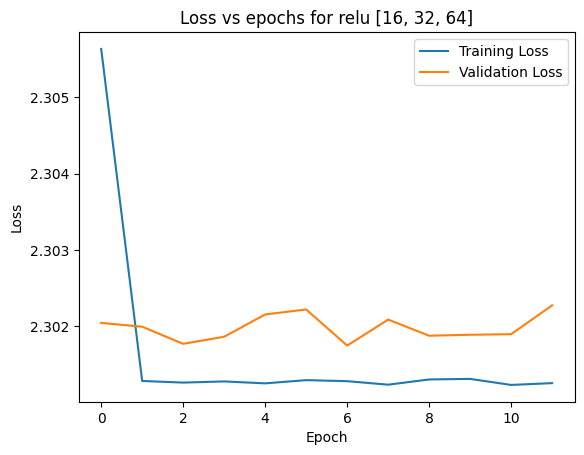

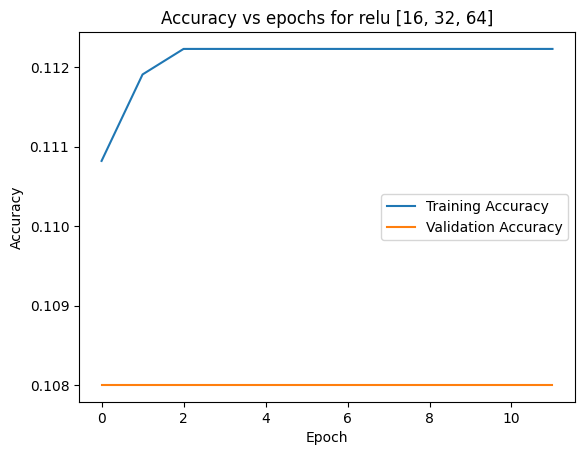

In [37]:
## Model 2 --> Adam, lr =0.001, CCE loss, hidden_neurons=[16,32,64]. relu, dropout=0.75

hidden_neurons = [16,32,64]
activation_function = 'relu'
dropout_rate = 0.75

model, history,duration = train_model(
    activation_func=activation_function,
    hidden_neurons=hidden_neurons,
    optimizer=Adam,
    loss_func=CategoricalCrossentropy,
    epochs=100,
    dropout_rate=dropout_rate,
    learning_rate=0.001
)

test_loss, test_acc = model.evaluate(X_test,y_test)

print(f"Test loss={test_loss} Test accuracy = {test_acc}")
print(f"Time required to train the model is {duration} seconds")

result_df_dropout.loc[len(result_df_dropout.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    dropout_rate,
    duration,
    test_loss,
    test_acc
]

plot_metrics(history, activation_function, hidden_neurons)

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 16)                  │          16,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,706 (76.98 KB)

 Trainable params: 19,706 (76.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1118 - loss: 2.3042 - val_accuracy: 0.1080 - val_loss: 2.3018
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1134 - loss: 2.3013 - val_accuracy: 0.1080 - val_loss: 2.3021
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1101 - loss: 2.3016 - val_accuracy: 0.1080 - val_loss: 2.3022
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1120 - loss: 2.3012 - val_accuracy: 0.1080 - val_loss: 2.3018
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1124 - loss: 2.3010 - val_accuracy: 0.1080 - val_loss: 2.3016
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1155 - loss: 2.3010 - val_accuracy: 0.1080 - val_loss: 2.3017
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1139 - loss: 2.3011 - val_accuracy: 0.1080 - val_loss: 2.3021
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1125 - loss: 2

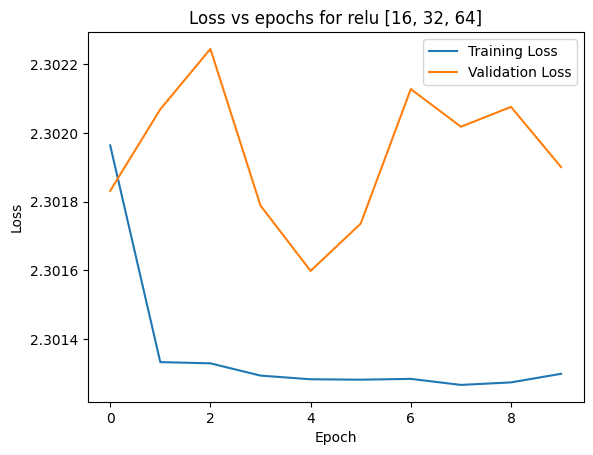

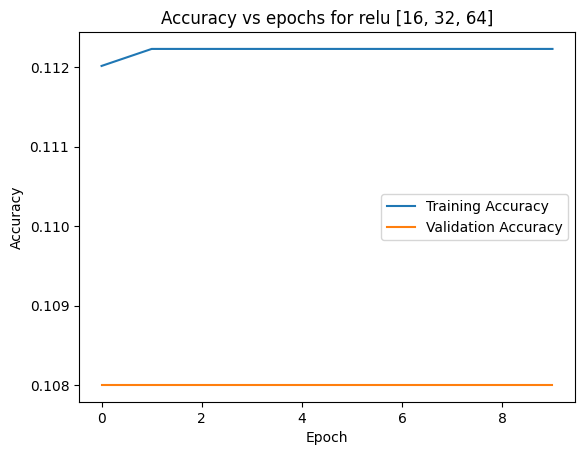

In [38]:
## Model 3 --> Adam, lr =0.001, CCE loss, hidden_neurons=[16,32,64]. relu, dropout=0.5

hidden_neurons = [16,32,64]
activation_function = 'relu'
dropout_rate = 0.5

model, history, duration = train_model(
    activation_func=activation_function,
    hidden_neurons=hidden_neurons,
    optimizer=Adam,
    loss_func=CategoricalCrossentropy,
    epochs=100,
    dropout_rate=dropout_rate,
    learning_rate=0.001
)

test_loss, test_acc = model.evaluate(X_test,y_test)

print(f"Test loss={test_loss} Test accuracy = {test_acc}")
print(f"Time taken to train the model is {duration} seconds")

result_df_dropout.loc[len(result_df_dropout.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    dropout_rate,
    duration,
    test_loss,
    test_acc
]

plot_metrics(history, activation_function, hidden_neurons)

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 16)                  │          16,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,706 (76.98 KB)

 Trainable params: 19,706 (76.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1099 - loss: 2.3045 - val_accuracy: 0.1080 - val_loss: 2.3020
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1137 - loss: 2.3010 - val_accuracy: 0.1080 - val_loss: 2.3019
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1126 - loss: 2.3008 - val_accuracy: 0.1080 - val_loss: 2.3020
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1137 - loss: 2.3011 - val_accuracy: 0.1080 - val_loss: 2.3020
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1100 - loss: 2.3015 - val_accuracy: 0.1080 - val_loss: 2.3018
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1107 - loss: 2.3015 - val_accuracy: 0.1080 - val_loss: 2.3021
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1142 - loss: 2.3010 - val_accuracy: 0.1080 - val_loss: 2.3016
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1111 - loss: 2

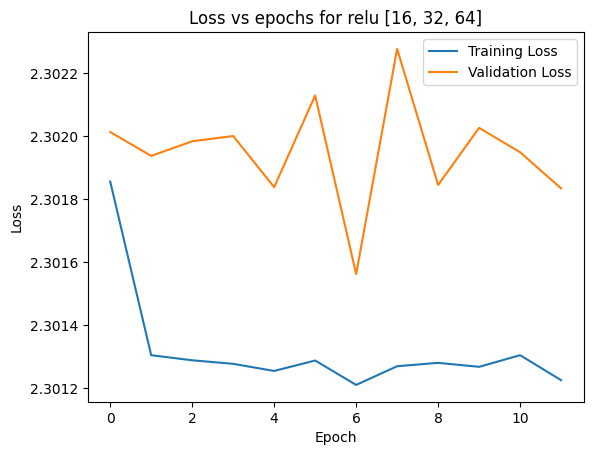

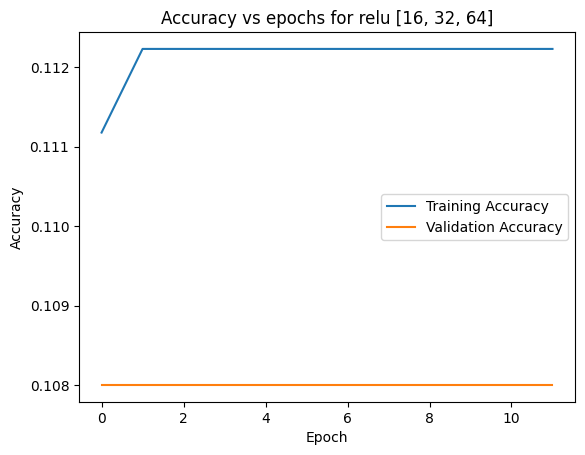

In [39]:
## Model 4 --> Adam, lr =0.001, CCE loss, hidden_neurons=[16,32,64]. relu, dropout=0.25

hidden_neurons = [16,32,64]
activation_function = 'relu'
dropout_rate = 0.25

model, history, duration = train_model(
    activation_func=activation_function,
    hidden_neurons=hidden_neurons,
    optimizer=Adam,
    loss_func=CategoricalCrossentropy,
    epochs=100,
    dropout_rate=dropout_rate,
    learning_rate=0.001
)

test_loss, test_acc = model.evaluate(X_test,y_test)

print(f"Test loss={test_loss} Test accuracy = {test_acc}")
print(f"Time taken to train the model is {duration} seconds")

result_df_dropout.loc[len(result_df_dropout.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    dropout_rate,
    duration,
    test_loss,
    test_acc
]

plot_metrics(history, activation_function, hidden_neurons)

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 16)                  │          16,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,706 (76.98 KB)

 Trainable params: 19,706 (76.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4060 - loss: 1.6379 - val_accuracy: 0.7073 - val_loss: 0.9236
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6211 - loss: 1.1505 - val_accuracy: 0.7421 - val_loss: 0.8267
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6544 - loss: 1.0685 - val_accuracy: 0.7470 - val_loss: 0.8004
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6727 - loss: 1.0284 - val_accuracy: 0.7141 - val_loss: 0.8889
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6723 - loss: 1.0184 - val_accuracy: 0.7553 - val_loss: 0.7918
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6791 - loss: 0.9962 - val_accuracy: 0.7739 - val_loss: 0.7553
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6836 - loss: 0.9714 - val_accuracy: 0.7789 - val_loss: 0.7208
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6905 - loss: 0

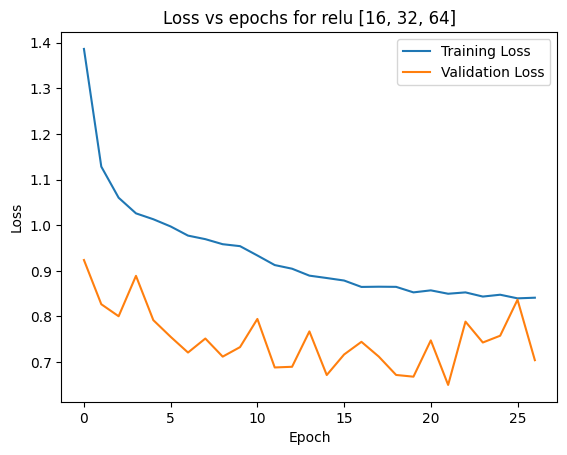

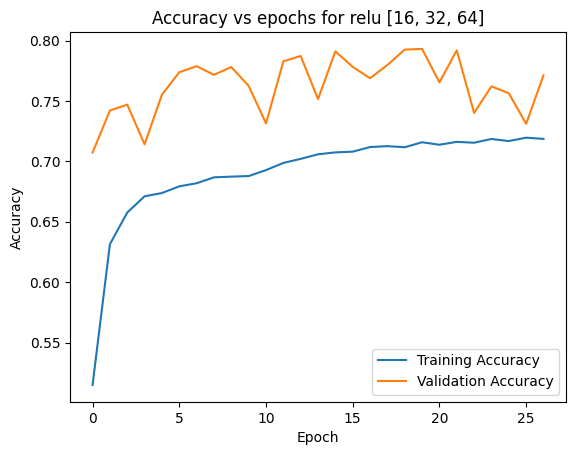

In [40]:
## Model 5 --> Adam, lr =0.001, CCE loss, hidden_neurons=[16,32,64]. relu, dropout=0.1

hidden_neurons = [16,32,64]
activation_function = 'relu'
dropout_rate = 0.1

model, history, duration = train_model(
    activation_func=activation_function,
    hidden_neurons=hidden_neurons,
    optimizer=Adam,
    loss_func=CategoricalCrossentropy,
    epochs=100,
    dropout_rate=dropout_rate,
    learning_rate=0.001
)

test_loss, test_acc = model.evaluate(X_test,y_test)

print(f"Test loss={test_loss} Test accuracy = {test_acc}")
print(f"Time taken to train the model is {duration} seconds")

result_df_dropout.loc[len(result_df_dropout.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    dropout_rate,
    duration,
    test_loss,
    test_acc
]

plot_metrics(history, activation_function, hidden_neurons)

In [41]:
result_df_dropout

,Hidden Layers,Activation Function,Hidden Neurons,Dropout Rate,Training Time (in seconds),Test Loss,Test Accuracy
0,3,relu,"[16, 32, 64]",0.90,37.405670,2.300971,0.119429
1,3,relu,"[16, 32, 64]",0.75,61.329699,2.300853,0.119429
2,3,relu,"[16, 32, 64]",0.50,51.372198,2.301025,0.119429
3,3,relu,"[16, 32, 64]",0.25,59.987741,2.301064,0.119429
4,3,relu,"[16, 32, 64]",0.10,138.471752,0.658535,0.800143


The best dropout rate is `0.1`

## **Question 07**
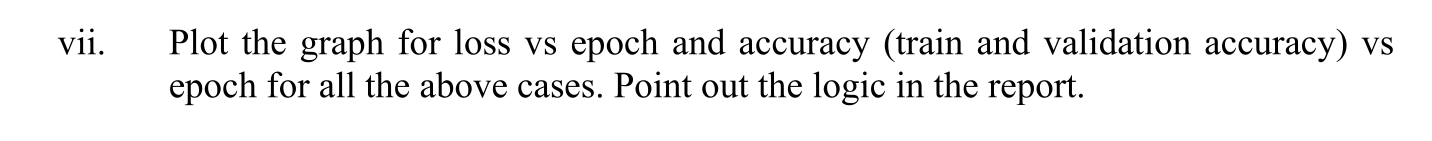

### **Logic**



1.   As we can see from the above reports for less number of hidden layers, the model performs better since the training dataset is of small size and the number of trainable parameters for more neurons in each layer exceeds the expectation of the dataset. So less neurons and less layers is the way to go for small datasets like MNIST.
2.   Sigmoid performs better than tanh and relu, although if dataset size is increased, we will more likely see that relu performs better, owing to its ability to prevent over-fitting.
3.   Adam performs better optimization(smooth decrease in loss) as compared to SGD.
4.   CategoricalCrossentropy loss is appropriate as compared to MSE since this is a classification task not regression.
5.   Low dropout rate is favourable for small datasets.
6.   For tanh and relu, early stopping occurs leading to fast convergence due to small dataset but lower accuracy than sigmoid due to early stopping criterion



## **Question 08**
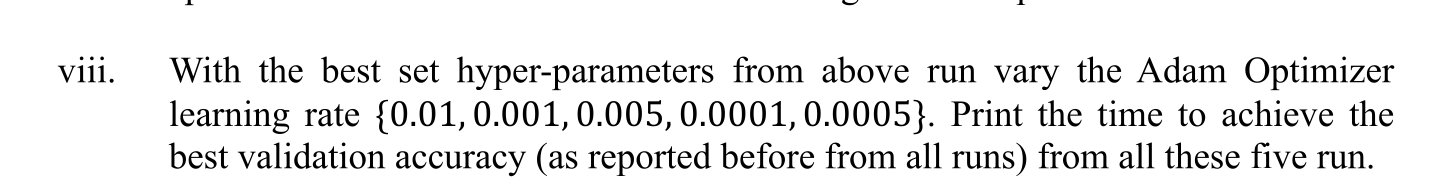

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_22 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 16)                  │          16,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,706 (76.98 KB)

 Trainable params: 19,706 (76.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1033 - loss: 2.3183 - val_accuracy: 0.1033 - val_loss: 2.3044
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1074 - loss: 2.3025 - val_accuracy: 0.1080 - val_loss: 2.3037
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1110 - loss: 2.3022 - val_accuracy: 0.1033 - val_loss: 2.3049
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1100 - loss: 2.3025 - val_accuracy: 0.1080 - val_loss: 2.3056
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1096 - loss: 2.3026 - val_accuracy: 0.0943 - val_loss: 2.3022
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1111 - loss: 2.3021 - val_accuracy: 0.1080 - val_loss: 2.3027
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1097 - loss: 2.3024 - val_accuracy: 0.1040 - val_loss: 2.3026
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1071 - loss: 2

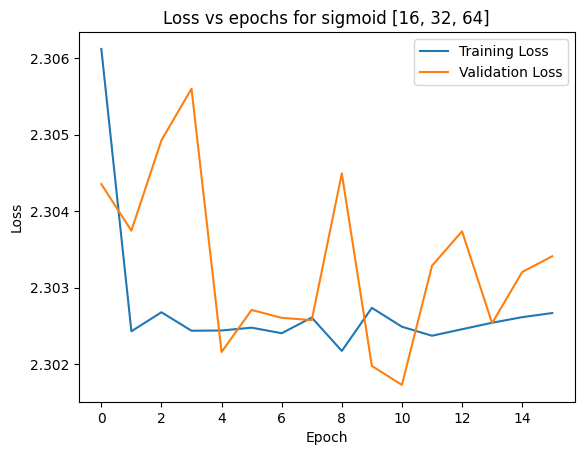

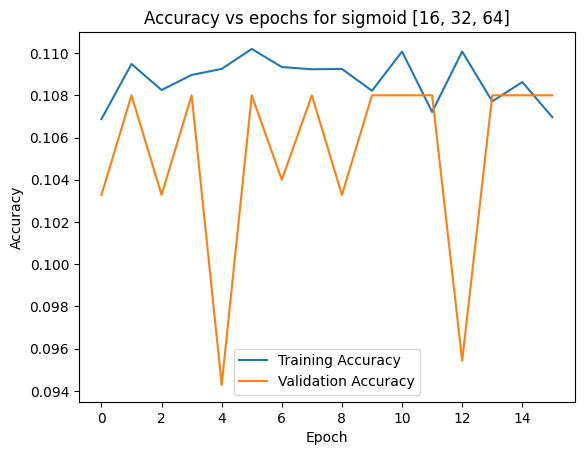

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_23 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 16)                  │          16,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,706 (76.98 KB)

 Trainable params: 19,706 (76.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2745 - loss: 1.9652 - val_accuracy: 0.7316 - val_loss: 0.9098
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6651 - loss: 0.9659 - val_accuracy: 0.8261 - val_loss: 0.6046
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7695 - loss: 0.7357 - val_accuracy: 0.8741 - val_loss: 0.4648
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8049 - loss: 0.6330 - val_accuracy: 0.8806 - val_loss: 0.4299
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8249 - loss: 0.5765 - val_accuracy: 0.8881 - val_loss: 0.3937
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8315 - loss: 0.5479 - val_accuracy: 0.8970 - val_loss: 0.3664
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8389 - loss: 0.5166 - val_accuracy: 0.8916 - val_loss: 0.3762
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8428 - loss: 0

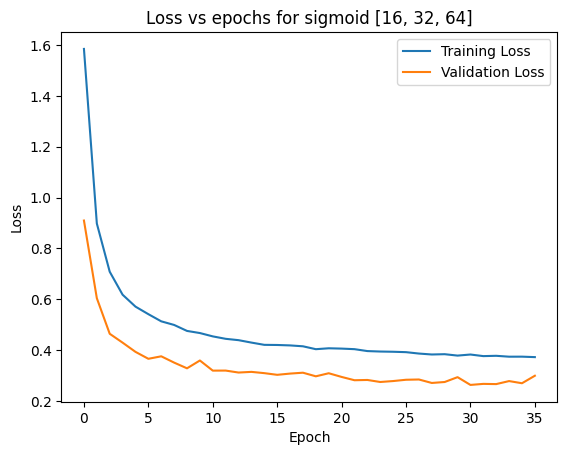

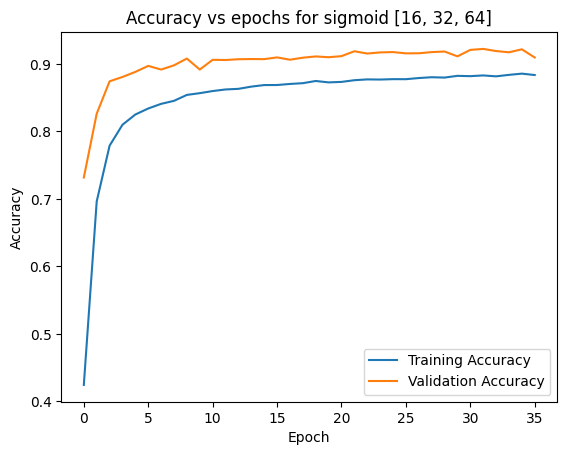

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_24 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 16)                  │          16,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,706 (76.98 KB)

 Trainable params: 19,706 (76.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1384 - loss: 2.1863 - val_accuracy: 0.1959 - val_loss: 1.8331
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1881 - loss: 1.9369 - val_accuracy: 0.1851 - val_loss: 1.8429
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1908 - loss: 1.9149 - val_accuracy: 0.1899 - val_loss: 1.8165
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1948 - loss: 1.9022 - val_accuracy: 0.1883 - val_loss: 1.8345
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1919 - loss: 1.8962 - val_accuracy: 0.2006 - val_loss: 1.8161
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1952 - loss: 1.8931 - val_accuracy: 0.1906 - val_loss: 1.8290
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2011 - loss: 1.8921 - val_accuracy: 0.2591 - val_loss: 1.7680
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2250 - loss: 1

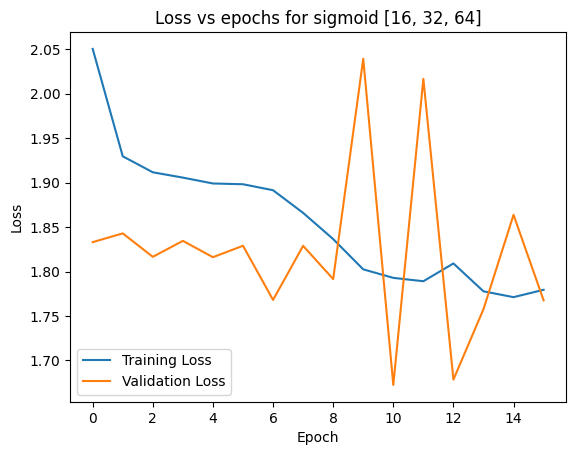

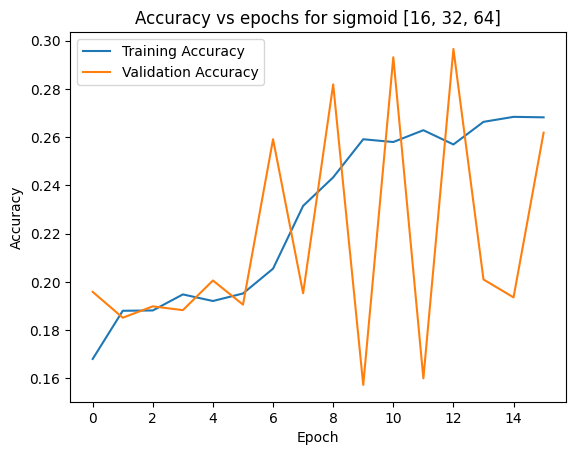

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_25 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 16)                  │          16,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,706 (76.98 KB)

 Trainable params: 19,706 (76.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1175 - loss: 2.3349 - val_accuracy: 0.2574 - val_loss: 2.1762
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.2592 - loss: 2.1093 - val_accuracy: 0.4377 - val_loss: 1.8098
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3984 - loss: 1.7545 - val_accuracy: 0.5507 - val_loss: 1.4426
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5074 - loss: 1.4313 - val_accuracy: 0.6306 - val_loss: 1.1801
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5710 - loss: 1.2213 - val_accuracy: 0.7029 - val_loss: 1.0208
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6147 - loss: 1.0800 - val_accuracy: 0.7191 - val_loss: 0.9271
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6410 - loss: 1.0077 - val_accuracy: 0.7576 - val_loss: 0.8654
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6644 - loss: 0

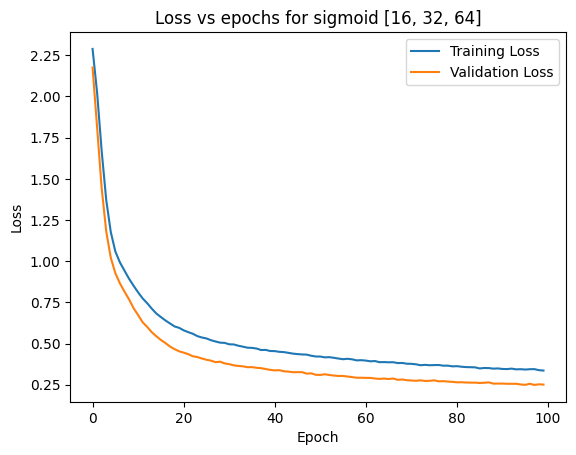

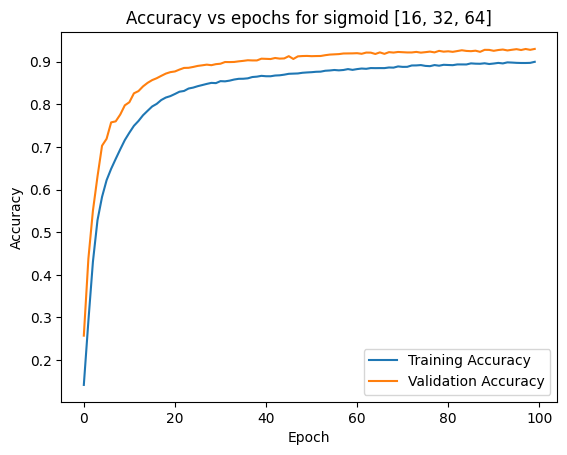

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_26 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 16)                  │          16,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,706 (76.98 KB)

 Trainable params: 19,706 (76.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2199 - loss: 2.1256 - val_accuracy: 0.6759 - val_loss: 1.1909
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6131 - loss: 1.1406 - val_accuracy: 0.8139 - val_loss: 0.7003
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7564 - loss: 0.7731 - val_accuracy: 0.8556 - val_loss: 0.5296
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8025 - loss: 0.6327 - val_accuracy: 0.8709 - val_loss: 0.4540
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8264 - loss: 0.5732 - val_accuracy: 0.8879 - val_loss: 0.4100
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8400 - loss: 0.5258 - val_accuracy: 0.8980 - val_loss: 0.3741
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8512 - loss: 0.4889 - val_accuracy: 0.9034 - val_loss: 0.3468
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8541 - loss: 0

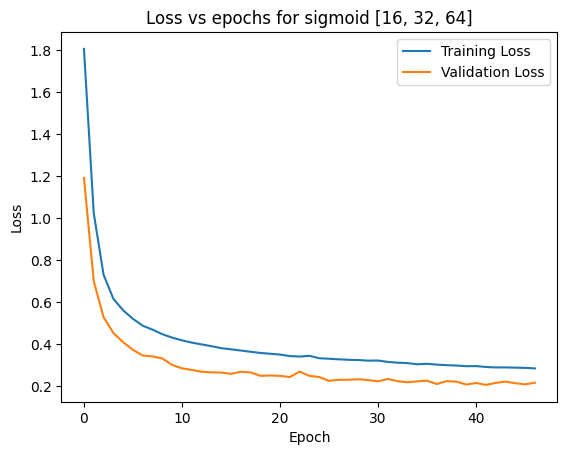

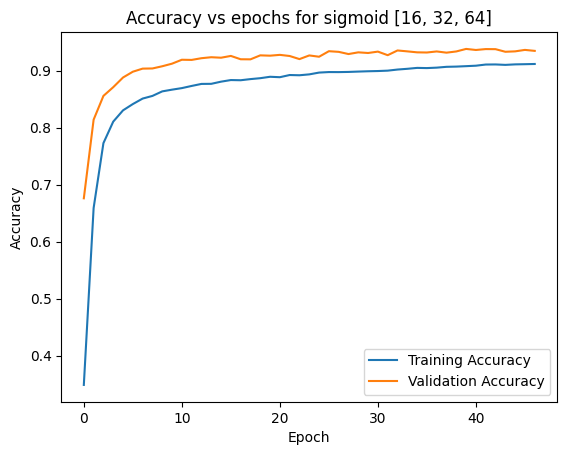

In [53]:
best_dropout_rate = 0.1
best_activation_function = 'sigmoid'
hidden_neurons = [16,32,64]

learning_rates = [0.01,0.001,0.005,0.0001,0.0005]

result_df_lr = pd.DataFrame(
    columns=[
        'Hidden Layers',
        'Hidden Neurons',
        'Learning Rate',
        'Dropout Rate',
        'Activation Function',
        'Training Time (in seconds)',
        'Test Loss',
        'Test Accuracy'
    ]
)

for lr in learning_rates:
    model, history, duration = train_model(
        hidden_neurons=hidden_neurons,
        learning_rate=lr,
        dropout_rate=best_dropout_rate,
        activation_func=best_activation_function,
        loss_func=CategoricalCrossentropy,
        optimizer=Adam,
        epochs=100
    )

    test_loss, test_acc = model.evaluate(X_test,y_test)

    print(f"Learning rate = {lr}")
    print(f"Test loss={test_loss} Test accuracy = {test_acc}")
    print(f"Time taken to train the model is {duration} seconds")

    result_df_lr.loc[len(result_df_lr.index)] = [
    len(hidden_neurons),
    str(hidden_neurons),
    lr,
    best_dropout_rate,
    best_activation_function,
    duration,
    test_loss,
    test_acc
    ]

    plot_metrics(history, activation_function, hidden_neurons)



In [54]:
result_df_lr

,Hidden Layers,Hidden Neurons,Learning Rate,Dropout Rate,Activation Function,Training Time (in seconds),Test Loss,Test Accuracy
0,3,"[16, 32, 64]",0.0100,0.1,sigmoid,73.584845,2.301192,0.119429
1,3,"[16, 32, 64]",0.0010,0.1,sigmoid,186.771840,0.263176,0.920286
2,3,"[16, 32, 64]",0.0050,0.1,sigmoid,75.207555,1.662789,0.296714
3,3,"[16, 32, 64]",0.0001,0.1,sigmoid,554.545058,0.250981,0.929286
4,3,"[16, 32, 64]",0.0005,0.1,sigmoid,262.312470,0.205785,0.939286


As we can see from above the best learning rate is `0.0005`

## **Question 09**
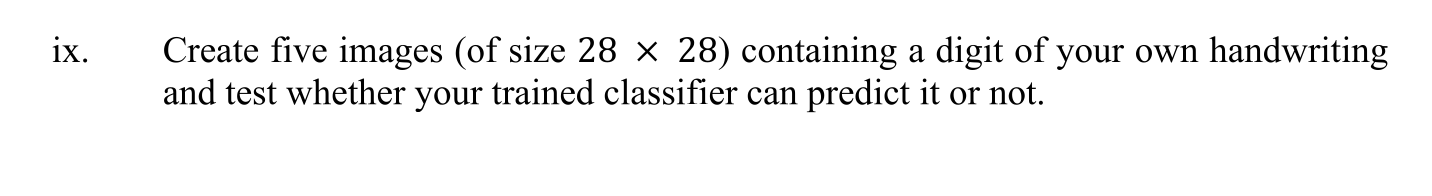

In [55]:
# Install necessary libraries

!pip install opencv-python
!pip install Pillow

In [56]:
# Import the libraries

import os
import numpy as np
from PIL import Image
import cv2

In [112]:
def process_image(image_path):
  img = Image.open(image_path).convert('L') # Convert to gray-scale
  img = img.resize((32,32))
  img_array = np.array(img)

  return img_array

# Testing it out
img_array = process_image('/content/sample_images/two.png')
print(img_array)

[[164 164 163 ... 151 150 150]
 [164 164 164 ... 152 150 150]
 [165 165 164 ... 152 151 150]
 ...
 [166 166 166 ... 154 153 152]
 [165 166 166 ... 154 152 152]
 [165 165 165 ... 153 152 152]]


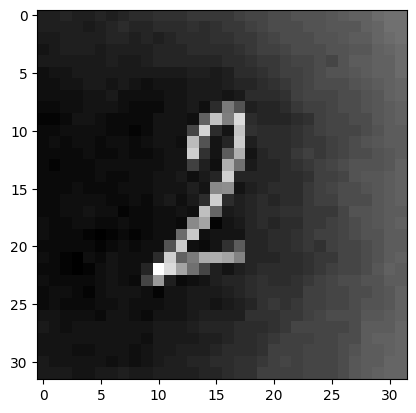

In [113]:
plt.imshow(img_array, cmap='Greys')
plt.show()

The resolution of the image is not upto the mark

In [114]:
IMG_DIR = '/content/sample_images'

images = []

image_files = [f for f in os.listdir(IMG_DIR) if os.path.isfile(os.path.join(IMG_DIR,f))]

images = []

for image_file in image_files:
  image_path = os.path.join(IMG_DIR,image_file)
  image_array = process_image(image_path)
  images.append(image_array)

images = np.array(images)
images.shape

(5, 32, 32)

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_27 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 16)                  │          16,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,706 (76.98 KB)

 Trainable params: 19,706 (76.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2258 - loss: 2.1062 - val_accuracy: 0.6690 - val_loss: 1.1130
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6298 - loss: 1.0791 - val_accuracy: 0.7670 - val_loss: 0.7234
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7355 - loss: 0.8068 - val_accuracy: 0.8324 - val_loss: 0.5794
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7855 - loss: 0.6915 - val_accuracy: 0.8546 - val_loss: 0.5212
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8123 - loss: 0.6292 - val_accuracy: 0.8790 - val_loss: 0.4441
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8284 - loss: 0.5773 - val_accuracy: 0.8866 - val_loss: 0.4133
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8434 - loss: 0.5277 - val_accuracy: 0.8971 - val_loss: 0.3718
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8563 - loss: 0

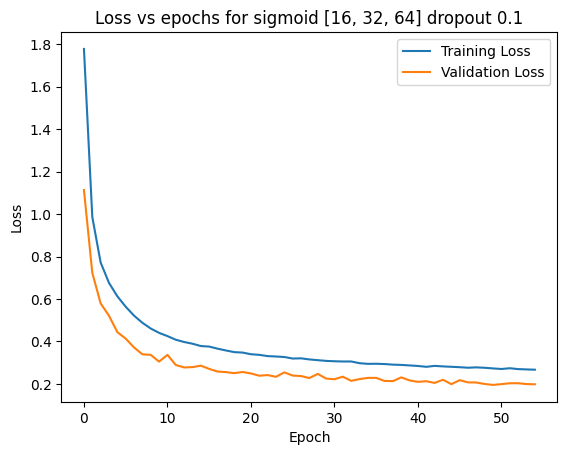

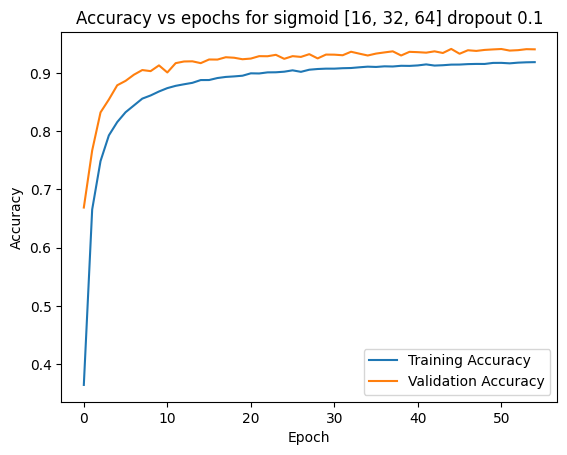

In [115]:
# Train the model (lr=0.0005), Adam optimizer, sigmoid function, dropout rate=0.1, CCE

model, history, duration = train_model(
        hidden_neurons=hidden_neurons,
        learning_rate=0.0005,
        dropout_rate=best_dropout_rate,
        activation_func=best_activation_function,
        loss_func=CategoricalCrossentropy,
        optimizer=Adam,
        epochs=100
    )

test_loss, test_acc = model.evaluate(X_test,y_test)

print(f"Learning rate = {0.0005}")
print(f"Test loss={test_loss} Test accuracy = {test_acc}")
print(f"Time taken to train the model is {duration} seconds")

plot_metrics(history,best_activation_function,hidden_neurons,dropout_rate=best_dropout_rate)

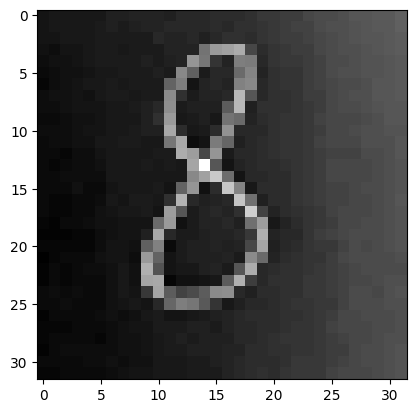

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
Prediction: 0


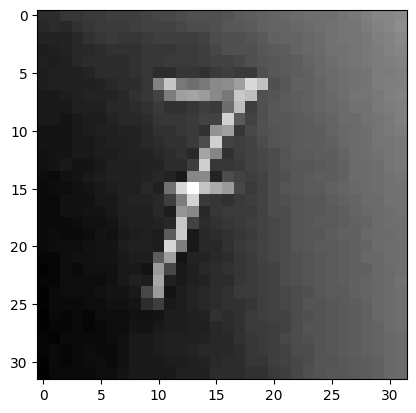

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: 0


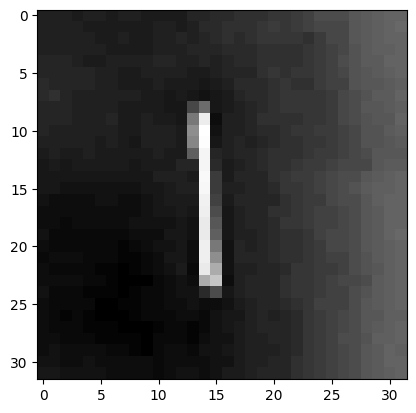

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: 5


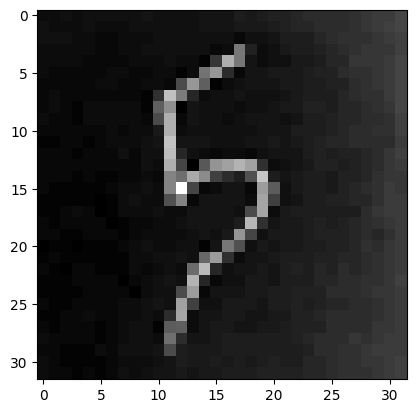

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: 5


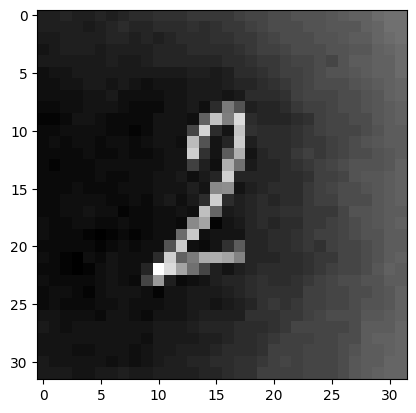

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction: 5


In [117]:
# Prediction

for image in images:
  plt.imshow(image,cmap='Greys')
  plt.show()
  prediction_array = model.predict(image.reshape(1,32,32))
  print(f"Prediction: {np.argmax(prediction_array)}")


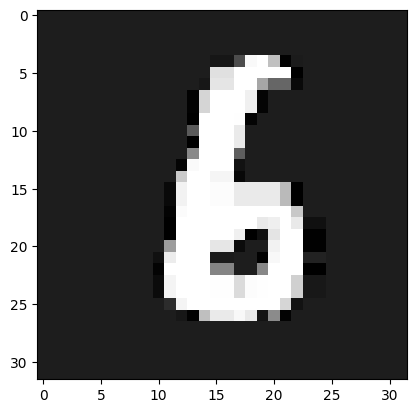

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Prediction: 6


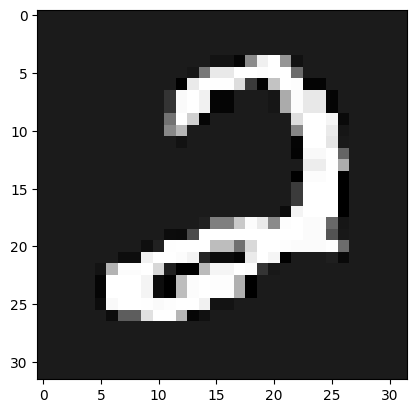

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: 2


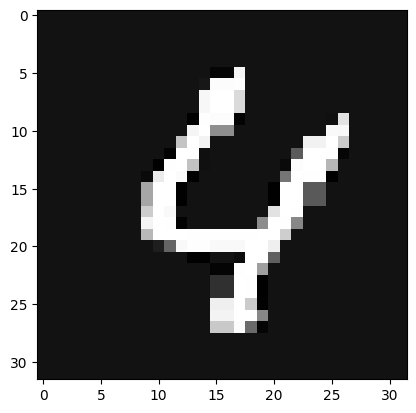

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction: 4


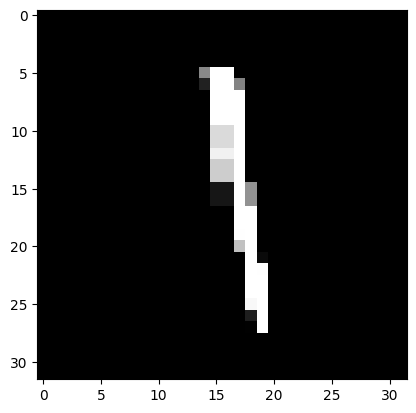

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Prediction: 1


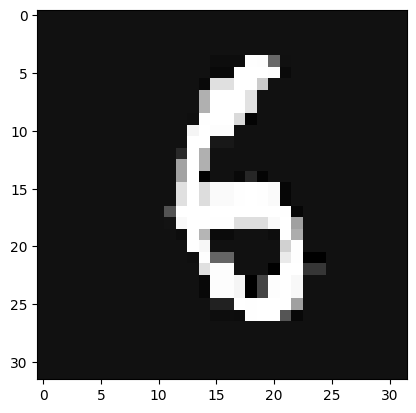

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction: 6


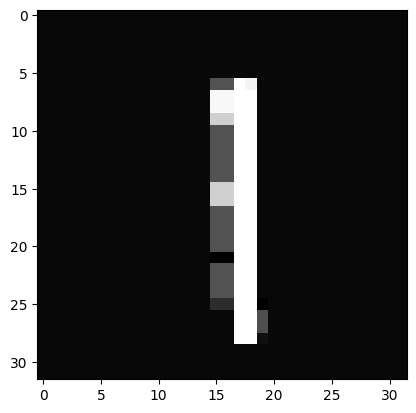

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction: 1


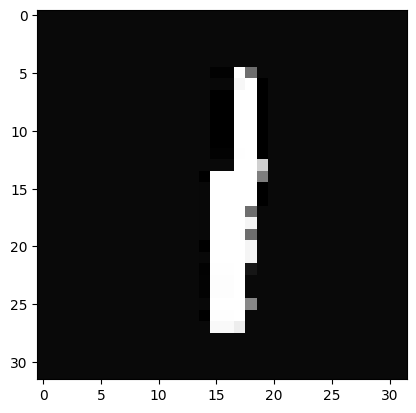

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction: 1


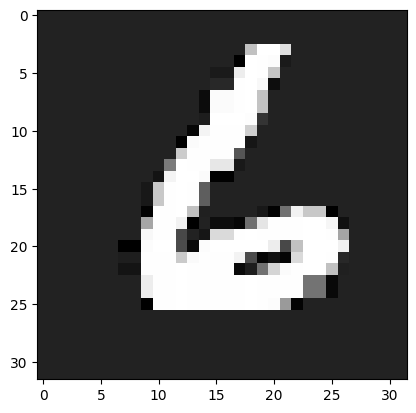

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: 6


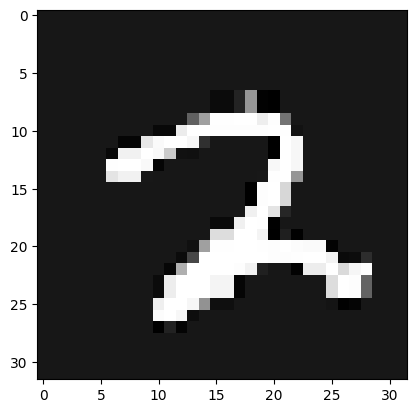

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction: 2


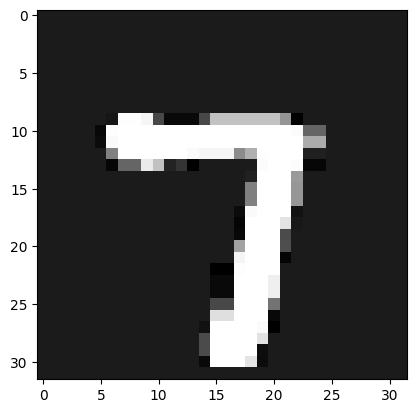

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction: 7


In [118]:
# Testing on taking 10 random samples from MNIST dataset(testing portion)

random_images = X_test[np.random.choice(X_test.shape[0], size=10, replace=False)]

for image in random_images:
  plt.imshow(image,cmap='Greys')
  plt.show()
  prediction_array = model.predict(image.reshape(1,32,32))
  print(f"Prediction: {np.argmax(prediction_array)}")


As we can see that taking random samples from a standardised MNIST dataset, there is 100% accurate prediction but for non-standard images the accuracy is 20%